Processing method: unintegrated


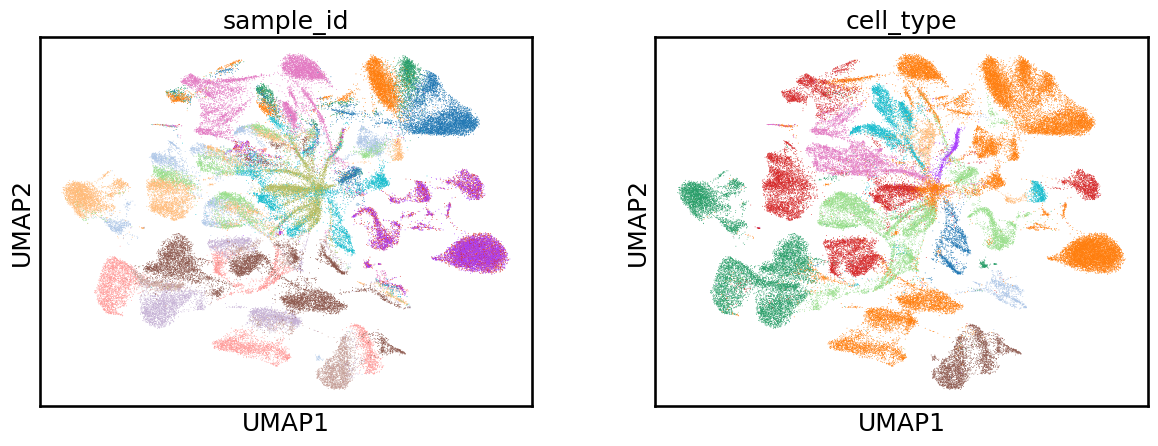

Calculating Batch ASW for unintegrated
Calculating Biological ASW for unintegrated
Processing method: scanorama


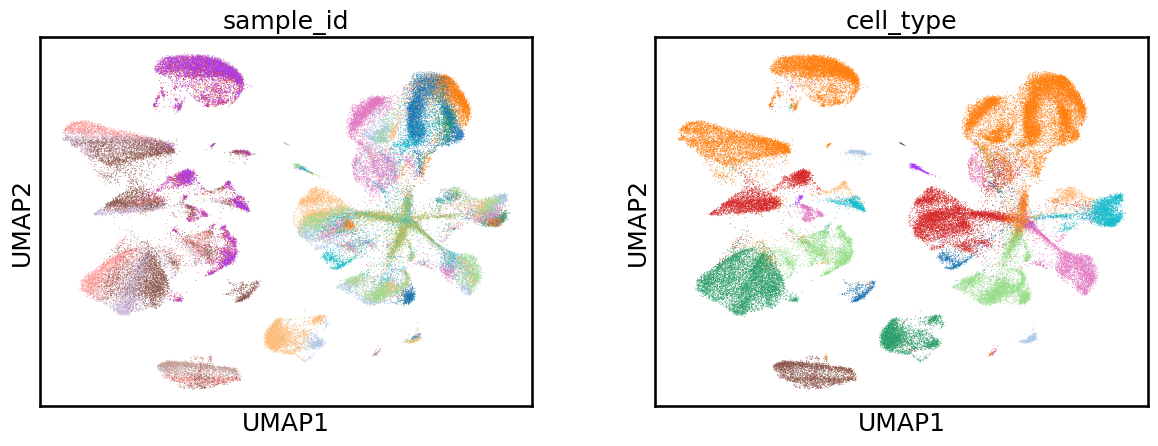

Calculating Batch ASW for scanorama
Calculating Biological ASW for scanorama
Processing method: harmony


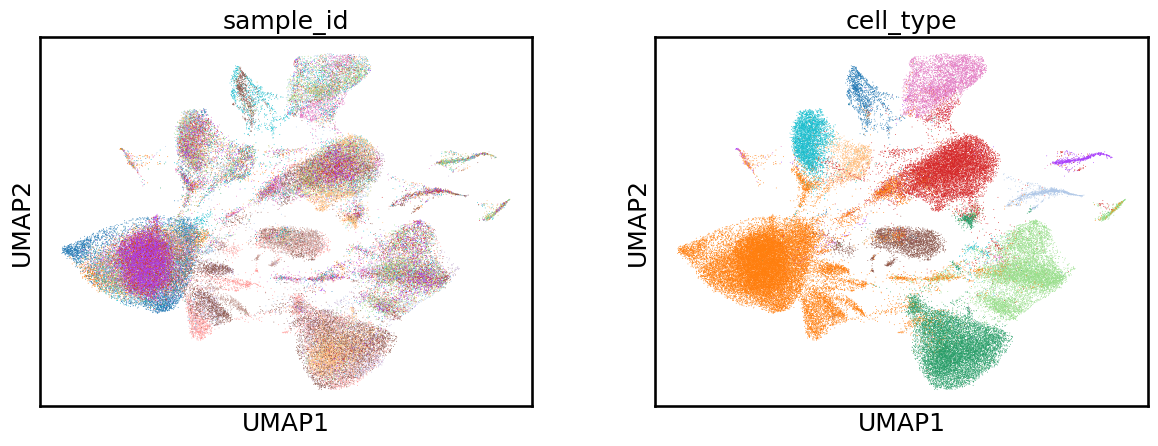

Calculating Batch ASW for harmony
Calculating Biological ASW for harmony


In [36]:
import scanpy as sc
import scib
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the AnnData objects
methods = ['unintegrated', 'scanorama', 'harmony']
adata_objects = {}

for method in methods:
    adata_objects[method] = sc.read_h5ad(f"{method}_adata.h5ad")

# Define the metric calculation functions
def calculate_silhouette(adata, key, embed, metric='euclidean'):
    return scib.metrics.silhouette(adata, key, embed=embed, metric=metric)

# Initialize an empty DataFrame to store metrics
metrics_df = pd.DataFrame(columns=['Method', 'Metric', 'Value'])

# Map for embedding
embedding_map = {
    'unintegrated': 'X_pca',
    'scanorama': 'Scanorama',
    'harmony': 'X_pca',
    'scVI': 'X_scVI'
}

for method, adata in adata_objects.items():
    print(f"Processing method: {method}")

    embed = embedding_map[method]

    sc.pl.umap(adata, color=['sample_id', 'cell_type'], legend_loc=None, save=f'_selectedsamples_{method}.png')
    
    # Calculate batch ASW metric
    print(f"Calculating Batch ASW for {method}")
    #batch_asw = calculate_silhouette(adata, 'sample_id', embed)
    #metrics_df = pd.concat([metrics_df, pd.DataFrame({'Method': [method], 'Metric': ['Batch ASW'], 'Value': [batch_asw]})], ignore_index=True)
    
    # Calculate biological ASW metric
    print(f"Calculating Biological ASW for {method}")
    #bio_asw = calculate_silhouette(adata, 'cell_type', embed)
    #metrics_df = pd.concat([metrics_df, pd.DataFrame({'Method': [method], 'Metric': ['Biological ASW'], 'Value': [bio_asw]})], ignore_index=True)
    
# Save metrics to CSV
#metrics_df.to_csv('metrics.csv', index=False)


In [28]:
metrics_df

,Method,Metric,Value
0,unintegrated,Batch ASW,0.472296
1,unintegrated,Biological ASW,0.606738
2,scanorama,Batch ASW,0.474624
3,scanorama,Biological ASW,0.603229
4,harmony,Batch ASW,0.432603
5,harmony,Biological ASW,0.661673


In [3]:
import socket
print(socket.gethostname())


b2.private
